In [1]:
import os
import cv2
from shapely.geometry import Polygon

from src import utils
import src
from src.data.annotations.coco_annotations_manager import \
    CocoAnnotationsManager
from src.visualization.image_visualizer import show_image
from src.data.augmentation import ImagesTemplatesManager


ANNOTATIONS_PATH = os.path.join(utils.DATA_PATH, 'annotations', 'annotations.json')
TEMPLATES_CONFIG_PATH = os.path.join(utils.DATA_PATH, 'annotations', 'templates.json')

CARD_IMAGES_PATH = os.path.join(utils.DATA_PATH, 'raw', 'templates')
IMAGE_NAME = '1.jpeg'

annotations_manager = CocoAnnotationsManager(ANNOTATIONS_PATH)
image_templates_manager = ImagesTemplatesManager(
    templates_config_path=TEMPLATES_CONFIG_PATH,
    annotation_manager=annotations_manager,
)

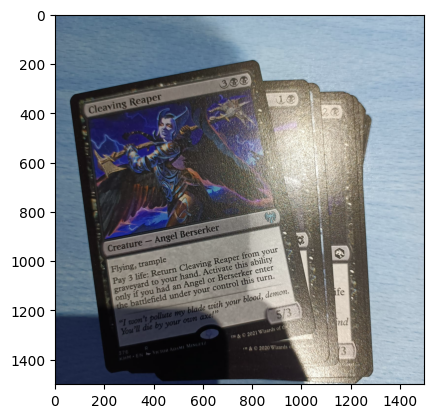

In [4]:
template = image_templates_manager.get_template_by_image_id(0)
show_image(template.image)

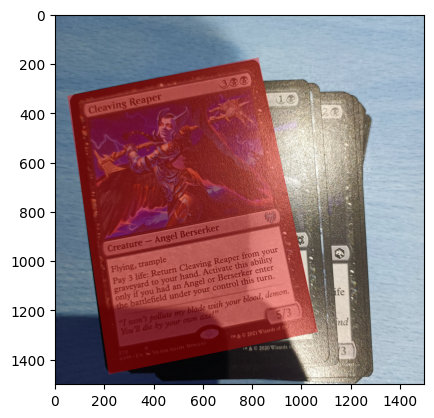

In [9]:
show_image(template.image, bbox=template.segmentation)

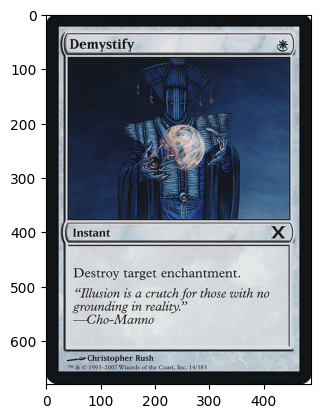

In [13]:
patch = cv2.imread(os.path.join(utils.DATA_PATH, 'raw', 'card_images', '20_normal.jpg'))
show_image(patch)

In [40]:
import numpy as np

source_points = np.float32([
    [0,0],
    [0,650],
    [0,500],
    [650,500]
])

dst_points = np.float32(list(template.segmentation.exterior.coords))
dst_points = np.float32(
    [
        [824.0, 176.0],
        [1064.0, 1288.0000000000005],
        [218.0, 1460.0],
        [50.0, 332.0],
    ]
)

In [38]:
list(template.segmentation.exterior.coords)

[(824.0, 176.0),
 (1064.0, 1288.0000000000005),
 (218.0, 1460.0),
 (50.0, 332.0),
 (824.0, 176.0)]

In [41]:
# https://www.programcreek.com/python/example/85017/cv2.getPerspectiveTransform
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(source_points,dst_points)

In [44]:
trans_img = cv2.warpPerspective(patch, M, (patch.shape[1], patch.shape[0]))

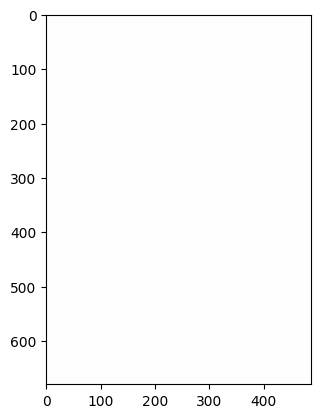

In [47]:
show_image(trans_img)